In [ ]:
import pandas as pd

# Reemplaza con la ruta correcta a tu archivo
df_med_emisiones = pd.read_csv('/content/BD_ConsolidadoNov2020_datosabiertos.csv')
df_med_emisiones.head()


,No,FECHA MEDICIÓN,CLASE DE VEHÍCULO,MODELO,RESULTADO,MUNICIPIO,CAUSA DE RECHAZO,FECHA REVISIÓN RTM,COMBUSTIBLE
0,1,2020-01-13T10:45:00Z,CAMIÓN,1998,RECHAZADA,ENVIGADO,GOBERNADOR NO LIMITA LAS REVOLUCIONES,SIN REGISTRO,DIESEL
1,2,2020-01-14T10:50:00Z,CAMIÓN,2015,RECHAZADA,ENVIGADO,GOBERNADOR NO LIMITA LAS REVOLUCIONES,SIN REGISTRO,DIESEL
2,3,2020-01-14T11:56:00Z,VOLQUETA,1993,RECHAZADA,ENVIGADO,CONDICIONES INSEGURAS (VISIBLE O SONORA),SIN REGISTRO,DIESEL
3,4,2020-01-14T12:14:00Z,CAMIÓN,1994,RECHAZADA,ENVIGADO,AUSENCIA DE TAPONES DE ACEITE O FUGAS EN EL MISMO,SIN REGISTRO,DIESEL
4,5,2020-01-14T14:25:00Z,BUSETA,2003,RECHAZADA,ENVIGADO,GOBERNADOR NO LIMITA LAS REVOLUCIONES,SIN REGISTRO,DIESEL


In [ ]:
df_med_emisiones.info()
df_med_emisiones.describe(include='all')
df_med_emisiones.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46803 entries, 0 to 46802
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  46803 non-null  int64 
 1   FECHA MEDICIÓN      46803 non-null  object
 2   CLASE DE VEHÍCULO   46803 non-null  object
 3   MODELO              46803 non-null  int64 
 4   RESULTADO           46803 non-null  object
 5   MUNICIPIO           46803 non-null  object
 6   CAUSA DE RECHAZO    46803 non-null  object
 7   FECHA REVISIÓN RTM  46803 non-null  object
 8   COMBUSTIBLE         46803 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.2+ MB


,0
No,0
FECHA MEDICIÓN,0
CLASE DE VEHÍCULO,0
MODELO,0
RESULTADO,0
MUNICIPIO,0
CAUSA DE RECHAZO,0
FECHA REVISIÓN RTM,0
COMBUSTIBLE,0


In [ ]:
df_med_emisiones['FECHA MEDICIÓN'] = pd.to_datetime(df_med_emisiones['FECHA MEDICIÓN'], errors='coerce')
df_med_emisiones['FECHA REVISIÓN RTM'] = pd.to_datetime(df_med_emisiones['FECHA REVISIÓN RTM'], errors='coerce')

<ipython-input-3-67c8a8ee3d9d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_med_emisiones['FECHA REVISIÓN RTM'] = pd.to_datetime(df_med_emisiones['FECHA REVISIÓN RTM'], errors='coerce')


In [ ]:
for col in ['CLASE DE VEHÍCULO', 'RESULTADO', 'COMBUSTIBLE', 'CAUSA DE RECHAZO']:
    df_med_emisiones[col] = df_med_emisiones[col].astype(str).str.upper().str.strip().replace({'NAN': None, '': None})


In [ ]:
df_med_emisiones['MODELO'] = pd.to_numeric(df_med_emisiones['MODELO'], errors='coerce')


In [ ]:
df_med_emisiones = df_med_emisiones.drop_duplicates()
df_med_emisiones = df_med_emisiones.dropna(subset=['FECHA MEDICIÓN', 'RESULTADO', 'CLASE DE VEHÍCULO'])

In [ ]:
df_med_emisiones

,No,FECHA MEDICIÓN,CLASE DE VEHÍCULO,MODELO,RESULTADO,MUNICIPIO,CAUSA DE RECHAZO,FECHA REVISIÓN RTM,COMBUSTIBLE
0,1,2020-01-13 10:45:00+00:00,CAMIÓN,1998,RECHAZADA,ENVIGADO,GOBERNADOR NO LIMITA LAS REVOLUCIONES,NaT,DIESEL
1,2,2020-01-14 10:50:00+00:00,CAMIÓN,2015,RECHAZADA,ENVIGADO,GOBERNADOR NO LIMITA LAS REVOLUCIONES,NaT,DIESEL
2,3,2020-01-14 11:56:00+00:00,VOLQUETA,1993,RECHAZADA,ENVIGADO,CONDICIONES INSEGURAS (VISIBLE O SONORA),NaT,DIESEL
3,4,2020-01-14 12:14:00+00:00,CAMIÓN,1994,RECHAZADA,ENVIGADO,AUSENCIA DE TAPONES DE ACEITE O FUGAS EN EL MISMO,NaT,DIESEL
4,5,2020-01-14 14:25:00+00:00,BUSETA,2003,RECHAZADA,ENVIGADO,GOBERNADOR NO LIMITA LAS REVOLUCIONES,NaT,DIESEL
...,...,...,...,...,...,...,...,...,...
46798,46799,2020-11-30 11:44:00+00:00,AUTOMÓVIL,2015,APROBADA,MEDELLÍN,NO APLICA,2020-09-25 00:00:00+00:00,GASOLINA
46799,46800,2020-11-30 11:54:00+00:00,AUTOMÓVIL,1986,RECHAZADA,SABANETA,EL VEHÍCULO NO CUMPLE CON LOS LÍMITES DE EMISI...,NaT,GASOLINA
46800,46801,2020-11-30 12:05:00+00:00,AUTOMÓVIL,2012,APROBADA,MEDELLÍN,NO APLICA,2020-10-30 00:00:00+00:00,GASOLINA
46801,46802,2020-11-30 12:16:00+00:00,AUTOMÓVIL,2013,APROBADA,MEDELLÍN,NO APLICA,2020-07-23 00:00:00+00:00,GASOLINA


In [ ]:
# Ver años mínimos y máximos del modelo
print(df_med_emisiones['MODELO'].describe())

# Valores únicos en resultado
print(df_med_emisiones['RESULTADO'].value_counts())

# Valores únicos de combustible
print(df_med_emisiones['COMBUSTIBLE'].value_counts())

# Revisar municipios
print(df_med_emisiones['MUNICIPIO'].unique())


count    46802.000000
mean      2008.736657
std         11.438315
min       1939.000000
25%       2007.000000
50%       2012.000000
75%       2015.000000
max       2021.000000
Name: MODELO, dtype: float64
RESULTADO
APROBADA     27596
RECHAZADA    19206
Name: count, dtype: int64
COMBUSTIBLE
DIESEL                           28372
GASOLINA                         17496
GAS NATURAL VEHICULAR (GNV)        475
GAS - GASOLINA                     432
ETANOL - GASOLINA                   22
GAS LICUADO DE PETROLEO (GLP)        5
Name: count, dtype: int64
['ENVIGADO' 'GIRARDOTA' 'MEDELLÍN' 'BELLO' 'ITAGÜÍ' 'LA ESTRELLA'
 'SABANETA' 'COPACABANA' 'BARBOSA' 'CALDAS']


In [ ]:
df_med_emisiones['AÑO_MEDICIÓN'] = df_med_emisiones['FECHA MEDICIÓN'].dt.year
df_med_emisiones['MES_MEDICIÓN'] = df_med_emisiones['FECHA MEDICIÓN'].dt.month
df_med_emisiones['ANTIGÜEDAD_VEHÍCULO'] = df_med_emisiones['AÑO_MEDICIÓN'] - df_med_emisiones['MODELO']


In [ ]:
df_med_emisiones.to_csv('control_emisiones_medellin_limpio.csv', index=False)


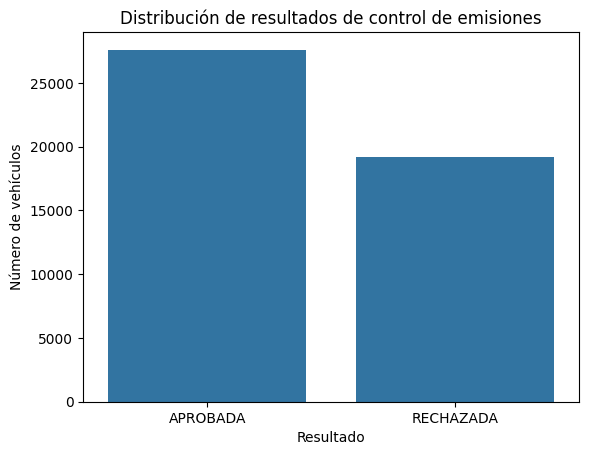

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_med_emisiones, x='RESULTADO', order=df_med_emisiones['RESULTADO'].value_counts().index)
plt.title('Distribución de resultados de control de emisiones')
plt.xlabel('Resultado')
plt.ylabel('Número de vehículos')
plt.show()


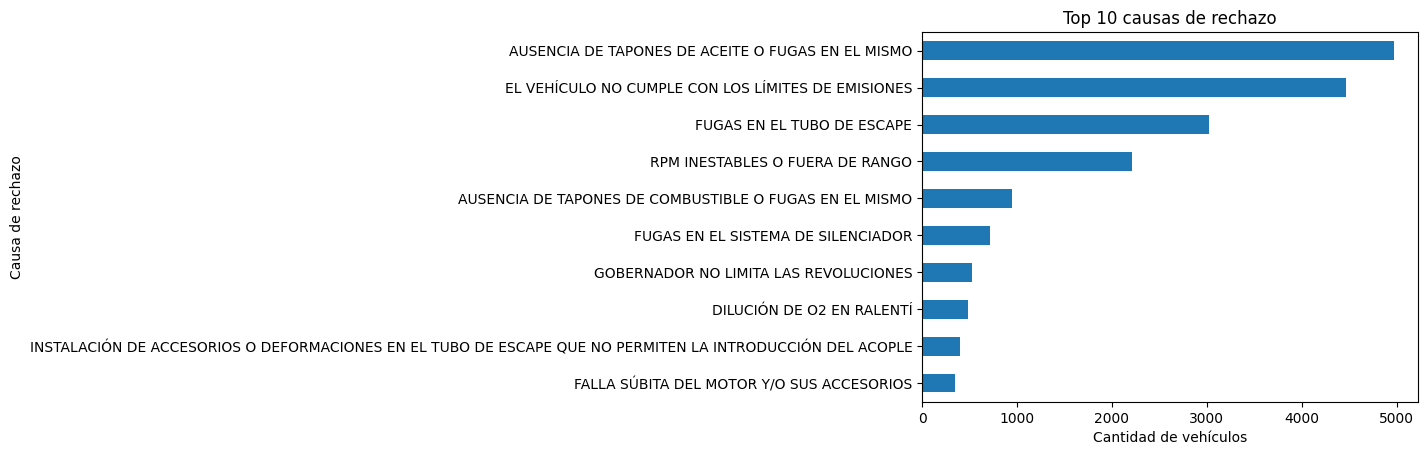

In [ ]:
rechazos = df_med_emisiones[df_med_emisiones['RESULTADO'] == 'RECHAZADA']
top_causas = rechazos['CAUSA DE RECHAZO'].value_counts().head(10)

top_causas.plot(kind='barh')
plt.title('Top 10 causas de rechazo')
plt.xlabel('Cantidad de vehículos')
plt.ylabel('Causa de rechazo')
plt.gca().invert_yaxis()
plt.show()


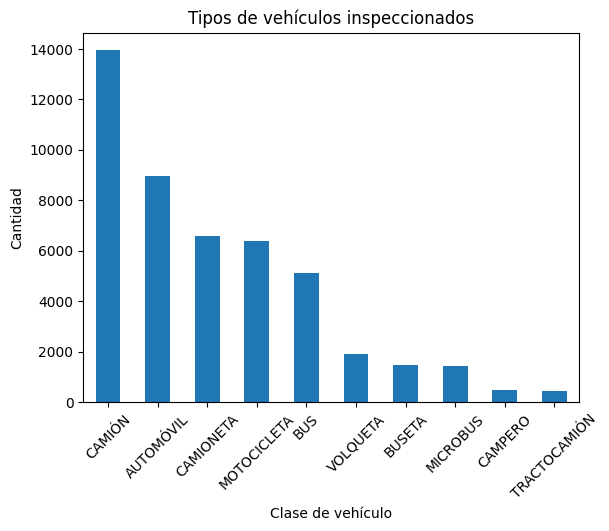

In [ ]:
df_med_emisiones['CLASE DE VEHÍCULO'].value_counts().head(10).plot(kind='bar')
plt.title('Tipos de vehículos inspeccionados')
plt.ylabel('Cantidad')
plt.xlabel('Clase de vehículo')
plt.xticks(rotation=45)
plt.show()


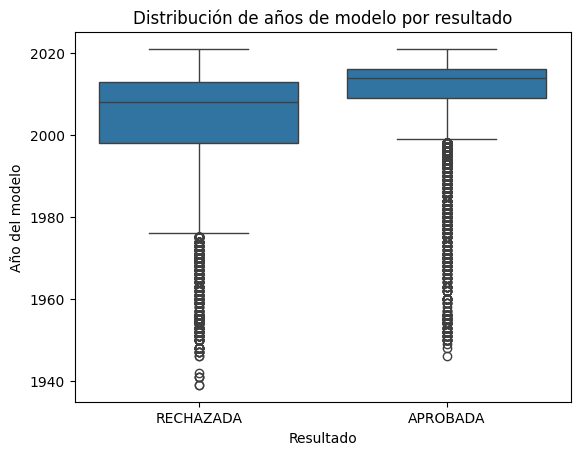

In [ ]:
sns.boxplot(data=df_med_emisiones, x='RESULTADO', y='MODELO')
plt.title('Distribución de años de modelo por resultado')
plt.ylabel('Año del modelo')
plt.xlabel('Resultado')
plt.show()


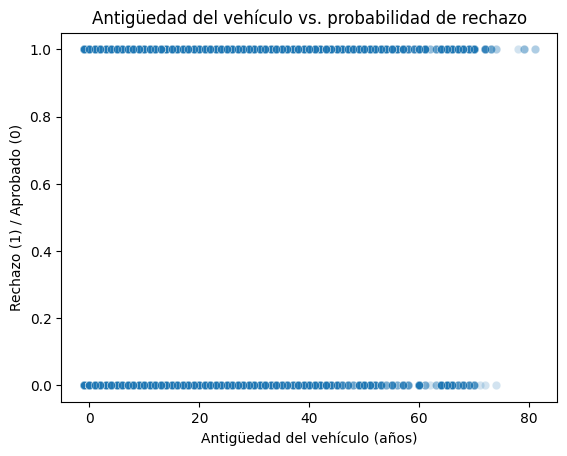

In [ ]:
df_med_emisiones['RECHAZO_BINARIO'] = df_med_emisiones['RESULTADO'].apply(lambda x: 1 if x == 'RECHAZADA' else 0)

sns.scatterplot(data=df_med_emisiones, x='ANTIGÜEDAD_VEHÍCULO', y='RECHAZO_BINARIO', alpha=0.2)
plt.title('Antigüedad del vehículo vs. probabilidad de rechazo')
plt.ylabel('Rechazo (1) / Aprobado (0)')
plt.xlabel('Antigüedad del vehículo (años)')
plt.show()


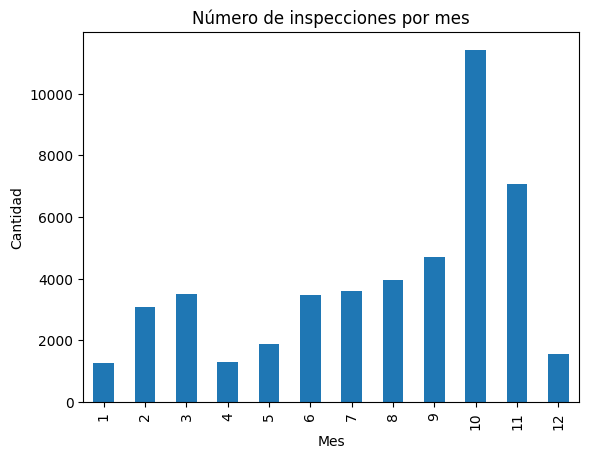

In [ ]:
df_med_emisiones['MES_MEDICIÓN'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de inspecciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.show()


In [ ]:
# Filtrar solo los registros del municipio de Medellín
df_medellin = df_med_emisiones[df_med_emisiones['MUNICIPIO'] == 'MEDELLÍN']


In [ ]:
df_medellin.head()


,No,FECHA MEDICIÓN,CLASE DE VEHÍCULO,MODELO,RESULTADO,MUNICIPIO,CAUSA DE RECHAZO,FECHA REVISIÓN RTM,COMBUSTIBLE,AÑO_MEDICIÓN,MES_MEDICIÓN,ANTIGÜEDAD_VEHÍCULO,RECHAZO_BINARIO
14,15,2020-05-02 11:22:00+00:00,BUS,2016,APROBADA,MEDELLÍN,NO APLICA,2019-06-13 00:00:00+00:00,DIESEL,2020,5,4,0
15,16,2020-05-02 11:32:00+00:00,BUS,2014,APROBADA,MEDELLÍN,NO APLICA,2019-02-10 00:00:00+00:00,DIESEL,2020,5,6,0
16,17,2020-05-02 11:37:00+00:00,BUS,2013,APROBADA,MEDELLÍN,NO APLICA,2019-02-20 00:00:00+00:00,DIESEL,2020,5,7,0
17,18,2020-05-02 11:39:00+00:00,BUS,2010,RECHAZADA,MEDELLÍN,RPM INESTABLES O FUERA DE RANGO,NaT,DIESEL,2020,5,10,1
18,19,2020-05-02 11:49:00+00:00,BUS,2014,APROBADA,MEDELLÍN,NO APLICA,NaT,DIESEL,2020,5,6,0


In [ ]:
df_medellin.shape


(26127, 13)

In [ ]:
df_medellin = df_med_emisiones[df_med_emisiones['MUNICIPIO'].str.strip().str.upper() == 'MEDELLÍN']


<ipython-input-35-472b83ebb360>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RESULTADO', y='ANTIGÜEDAD', data=df_medellin, palette="Set2")


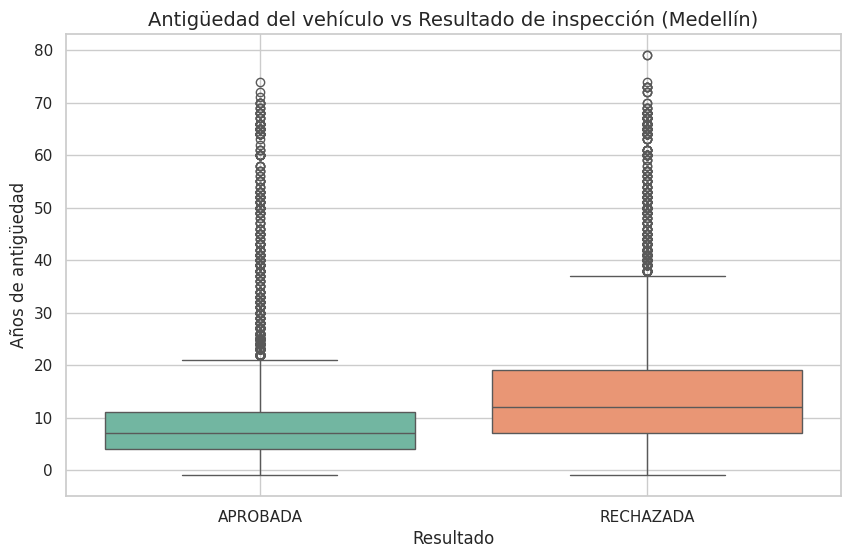


Promedio de antigüedad por resultado:
RESULTADO
APROBADA      8.099922
RECHAZADA    15.144405
Name: ANTIGÜEDAD, dtype: float64


<ipython-input-35-472b83ebb360>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_medellin[df_medellin['RESULTADO'] == 'RECHAZADA'],


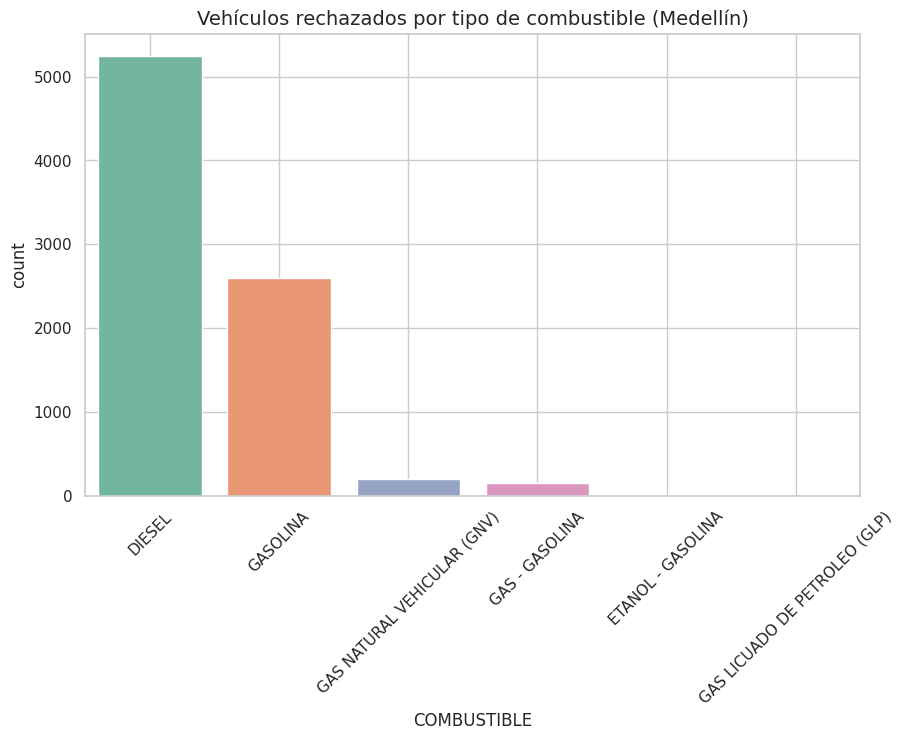

<ipython-input-35-472b83ebb360>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vehiculos_rechazados,


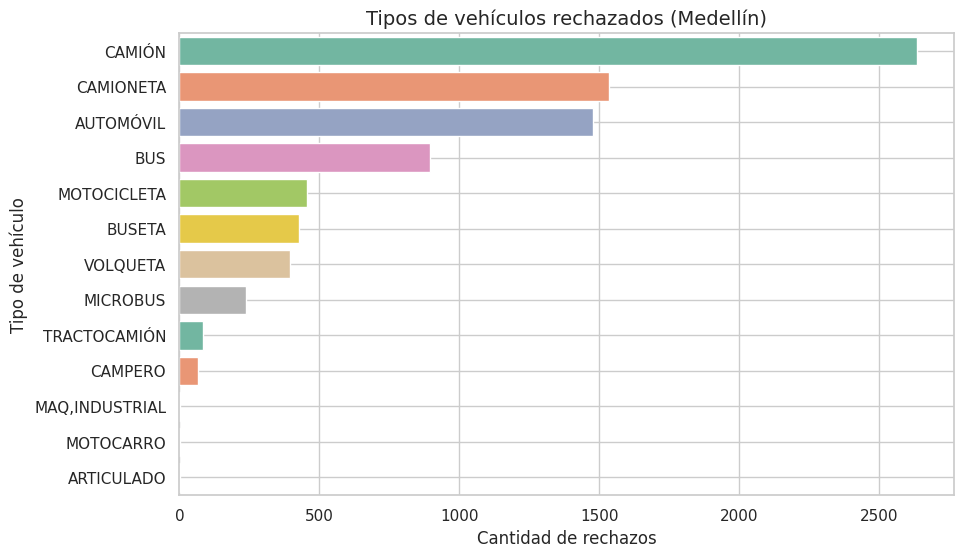

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo general
sns.set(style="whitegrid", palette="Set2")  # Paleta más visual

# 1. Filtrar solo datos de Medellín
df_medellin = df_med_emisiones[df_med_emisiones['MUNICIPIO'].str.strip().str.upper() == 'MEDELLÍN'].copy()

# 2. Calcular antigüedad del vehículo
df_medellin['ANTIGÜEDAD'] = 2020 - df_medellin['MODELO']

# 3. Boxplot: Antigüedad vs Resultado
plt.figure(figsize=(10,6))
sns.boxplot(x='RESULTADO', y='ANTIGÜEDAD', data=df_medellin, palette="Set2")
plt.title('Antigüedad del vehículo vs Resultado de inspección (Medellín)', fontsize=14)
plt.ylabel('Años de antigüedad')
plt.xlabel('Resultado')
plt.grid(True)
plt.show()

# 4. Promedio de antigüedad por resultado
print("\nPromedio de antigüedad por resultado:")
print(df_medellin.groupby('RESULTADO')['ANTIGÜEDAD'].mean())

# 5. Rechazos por tipo de combustible
plt.figure(figsize=(10,6))
sns.countplot(data=df_medellin[df_medellin['RESULTADO'] == 'RECHAZADA'],
              x='COMBUSTIBLE',
              order=df_medellin['COMBUSTIBLE'].value_counts().index,
              palette="Set2")
plt.title('Vehículos rechazados por tipo de combustible (Medellín)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 6. Tipos de vehículos más rechazados
vehiculos_rechazados = df_medellin[df_medellin['RESULTADO'] == 'RECHAZADA']
plt.figure(figsize=(10,6))
sns.countplot(data=vehiculos_rechazados,
              y='CLASE DE VEHÍCULO',
              order=vehiculos_rechazados['CLASE DE VEHÍCULO'].value_counts().index,
              palette="Set2")
plt.title('Tipos de vehículos rechazados (Medellín)', fontsize=14)
plt.xlabel('Cantidad de rechazos')
plt.ylabel('Tipo de vehículo')
plt.grid(True)
plt.show()
